# GUIDE MULTICLASS CLASSIFICATION PROBLEM

In this notebook I will solve a multiclass classification problem with 10 targets. **The goal for this notebook is to give a idea of the steps we need to follow to solve a multiclass classification problem**. There's almost no data preprocessing since the dataset is very straight forward and doesnt have missing values.

The problem we will be solving is this:  [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer)

In this notebook I basically review the great work done in the following notebook:
* [Introduction to CNN Keras - 0.997 (top 6%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)

Ok, we begin by importing a set of packages we'll be needing:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

Importing the data:

In [6]:
train = pd.read_csv("/home/pablo/Escritorio/Postgrado_UB/Problemas Kaggle/Plantillas/CLASIFICACIÓN MULTICLASS- MNIST/datos/train.csv")
test = pd.read_csv("/home/pablo/Escritorio/Postgrado_UB/Problemas Kaggle/Plantillas/CLASIFICACIÓN MULTICLASS- MNIST/datos/test.csv")

In [7]:
y_train=train['label']
x_train=train.drop('label',axis=1)

## STEP 0 : EXPLORATORY DATA ANALYSIS (EDA)

First of all, let's take a look a our data. None of the columns have missing data and the different categories are evenly represented

missing values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

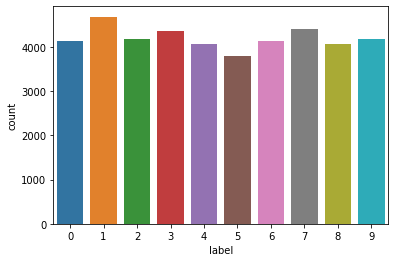

In [8]:
y_train.value_counts()
sns.countplot(y_train)

print('missing values: ', x_train.isnull().sum().values)

Each row represents the grayscale image of a number and each column is a single number that represents the brightness of the pixel. The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white.

So let's **normalize** to reduce the effect of the difference in illumination

In [9]:
x_train=x_train/255
test = test / 255

Let's plot one row to see what it looks like:

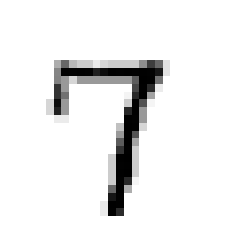

In [10]:
some_digit = np.array(x_train.iloc[6])

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

## STEP 1 : DATA PREPROCESSING

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoded = enc.fit_transform(train['label'])

## STEP 2 : MODELLING

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=1235)

### 2.1 Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

rfc = RandomForestClassifier()

rfc.fit(X_train,Y_train)

predictions  = rfc.predict(X_val)
accuracy     = accuracy_score(Y_val,predictions)
print('accuracy: ',accuracy)

accuracy:  0.9685714285714285


### 2.2 LGBM

In [21]:
lgbm = LGBMClassifier(n_estimators=500, random_state=3)
lgbm = lgbm.fit(X_train, Y_train)

In [22]:
predictions_lgbm  = lgbm.predict(X_val)
accuracy_lgbm     = accuracy_score(Y_val,predictions_lgbm)
print('accuracy_lgbm: ',accuracy_lgbm)

accuracy_lgbm:  0.9807142857142858
